# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Irka Tri Agustin
- **Email:** irkatri.kd@gmail.com
- **ID Dicoding:**-

## Menentukan Pertanyaan Bisnis

1. Bagaimana performa jumlah penyewaan sepeda beberapa tahun terakhir?
2. Pada hari apa dalam seminggu jumlah penyewa sepeda paling banyak?
3. Pada musim apa jumlah penyewaan sepeda terbanyak?
4. Berapa perbandingan jumlah penyewa sepeda yang berstatus registered dan casual?

## Import Semua Packages/Library yang Digunakan

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Data yang digunakan adalah **Bike Sharing Dataset**, terdapat 2 jenis file didalamnya dan kita akan menggunakan salah satu filenya saja yaitu **day.csv**

In [5]:
df_day = pd.read_csv("day.csv")
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

1. Memeriksa tipe data dalam data

In [6]:
# memeriksa tipe data tiap kolom pada data df_day
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dapat dianalisis bahwa terdapat ketidaksesuaian tipe data pada beberapa kolom, seperti pada kolom **dteday** yang seharusnya menggunakan **datetime** dan pada beberapa kolom lain yaitu season, mnth, weekday.

2. Memeriksa missing value pada data

In [7]:
# memeriksa missing value pada data df_day
df_day.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Dapat dianalisis bahwa **tidak** terdapat missing value pada data dengan ditandai angka 0 pada setiap kolom

3. Memeriksa duplicate pada data

In [8]:
# memeriksa duplicate pada data df_day
df_day.duplicated().sum()

0

Dapat dianalisis bahwa **tidak** terdapat duplicate pada data

4. Memeriksa jumlah baris dan kolom pada data

In [9]:
# memeriksa jumlah baris dan kolom pada data df_day
print(df_day.shape)

(731, 16)


Dapat dianalisis bahwa terdapat 731 baris dan 16 kolom

### Cleaning Data

1. Mengganti tipe data pada kolom yang belum sesuai

In [10]:
# mengubah tipe data menjadi datetime
df_day['dteday'] = pd.to_datetime(df_day['dteday'])

2. Memperbaiki values (nilai) dari kolom **weekday, mnth, yr, season**

In [11]:
# mengubah nilai weekday dengan hari kerja yang sesuai
df_day['weekday'] = df_day['dteday'].dt.day_name()

In [12]:
# mengubah nilai mnth dengan bulan yang sesuai
df_day['mnth'] = df_day['dteday'].dt.month_name()

In [13]:
# mengubah nilai yr dengan tahun yang sesuai
df_day['yr'] =df_day['dteday'].dt.year

In [15]:
# mengubah nilai season dengan musim yang sesuai
df_day.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)

3. Melakukan normalisasi data pada kolom temp, atemp, hum dan windspeed.

In [16]:
df_day['temp'] = df_day['temp']*41
df_day['atemp'] = df_day['atemp']*50
df_day['hum'] = df_day['hum']*100
df_day['windspeed'] = df_day['windspeed']*67

In [17]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,0,Saturday,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,Spring,2011,January,0,Sunday,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,Spring,2011,January,0,Monday,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,Spring,2011,January,0,Tuesday,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,Spring,2011,January,0,Wednesday,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Kita sudah mengganti tipe data dari kolom dteday menjadi datetime, kemudian mengganti value dari beberapa kolom seperti pada kolom season kita sudah merubahnya menjadi musim yang sesuai (summer, spring, fall, winter), kemudian pada kolom mnth kita sudah merubah nilainya menjadi nama bulan yang sesuai, kemudian pada kolom yr kita juga sudah merubah nilainya menjadi tahun yang sesuai dengan dteday, dan pada kolom weekday kita juga sudah merubah nilainya menjadi nama hari dalam satu minggu.

In [18]:
df_day.to_csv("df_day.csv", index=False)

## Exploratory Data Analysis (EDA)

1. Menganalisis data menggunakan parameter statistik

In [19]:
# memeriksa parameter statistik pada data
df_day.describe()

,instant,dteday,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2011.500684,0.028728,0.683995,1.395349,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,2011.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2011.000000,0.000000,0.000000,1.000000,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,2012.000000,0.000000,1.000000,1.000000,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,2012.000000,0.000000,1.000000,2.000000,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,2012.000000,1.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,0.500342,0.167155,0.465233,0.544894,7.505091,8.148059,14.242910,5.192357,686.622488,1560.256377,1937.211452


Dapat dianalisis bahwasannya rata-rata pengguna sepeda (registered dan casual) sebesar 4504.348, kemudian nilai maksimum berkisar 8714 dan nilai minimum berkisar 22.

2. Mengelompokkan penyewa sepeda (registered dan casual) berdasarkan musim (season)

In [20]:
# menggabungkan kolom season dan cnt untuk mengidentifikasi nilai max, min,mean dan sum
df_day.groupby(by='season').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                            
         max   min         mean      sum
season                                  
Fall    8714  1115  5644.303191  1061129
Spring  7836   431  2604.132597   471348
Summer  8362   795  4992.331522   918589
Winter  8555    22  4728.162921   841613

Dapat disimpulkan bahwa nilai rata-rata terbesar dan jumlah penyewa terbanyak adalah **musim** **gugur** (**fall**), sedangkan rata-rata terkecil dan jumlah penyewa terkecil adalah **musim semi (spring**).

3. Mengelompokkan penyewa sepeda (registered dan casual) berdasarkan tahun (yr)

In [21]:
# menggabungkan kolom yr dan cnt untuk mengidentifikasi nilai max, min,mean dan sum
df_day.groupby(by='yr').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                           
       max  min         mean      sum
yr                                   
2011  6043  431  3405.761644  1243103
2012  8714   22  5599.934426  2049576

Dapat disimpulkan bahwa nilai rata-rata penyewa sepeda terbesar ada di tahun 2012

4. Mengelompokkan penyewa sepeda (registered dan casual) berdasarkan bulan (mnth)

In [22]:
# menggabungkan kolom mnth dan cnt untuk mengidentifikasi nilai max, min,mean dan sum
df_day.groupby(by='mnth').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                           
            max   min         mean     sum
mnth                                      
April      7460   795  4484.900000  269094
August     7865  1115  5664.419355  351194
December   6606   441  3403.806452  211036
February   5062  1005  2655.298246  151352
January    4521   431  2176.338710  134933
July       8173  3285  5563.677419  344948
June       8120  3767  5772.366667  346342
March      8362   605  3692.258065  228920
May        8294  2633  5349.774194  331686
November   6852  1495  4247.183333  254831
October    8156    22  5199.225806  322352
September  8714  1842  5766.516667  345991

Dapat disimpulkan bahwa nilai rata-rata terbesar penyewa sepeda adalah bulan juni dan yang terendah adalah bulan januari.

5. Mengidentitikasi distribusi data penyewa sepeda (registered dan casual) menggunakan histogram

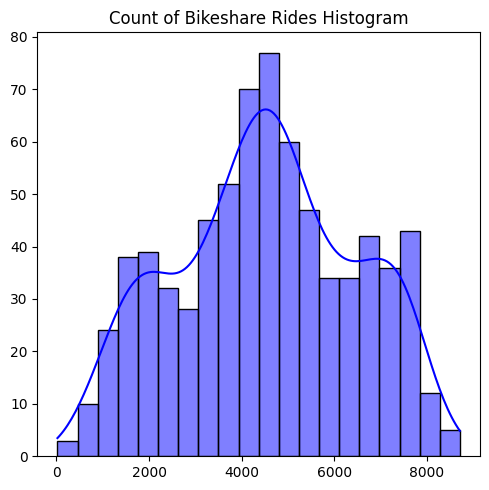

In [23]:
fig, ax = plt.subplots(figsize=(5, 5))

sns.histplot(df_day['cnt'], kde=True, bins=20, color='blue', ax=ax)

ax.set_title("Count of Bikeshare Rides Histogram")
ax.set_xlabel("")
ax.set_ylabel("")

plt.tight_layout()

plt.show()

  Dapat disimpulkan bahwa distribusi data dari penyewa sepeda (registered dan casual) termasuk kategori **normal distribution**.

## Visualization & Explanatory Analysis

1. Bagaimana performa jumlah penyewaan sepeda beberapa tahun terakhir?
2. Pada hari apa dalam seminggu jumlah penyewa sepeda paling banyak?
3. Pada musim apa jumlah penyewaan sepeda terbanyak?
4. Berapa perbandingan jumlah penyewa sepeda yang berstatus registered dan casual?

### Pertanyaan 1: Bagaimana performa jumlah penyewaan sepeda beberapa tahun terakhir?

In [24]:
year_df = df_day.resample(rule='ME', on='dteday').agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})
year_df.head()

,casual,registered,cnt
dteday,,,
2011-01-31,3073,35116,38189
2011-02-28,6242,41973,48215
2011-03-31,12826,51219,64045
2011-04-30,22346,72524,94870
2011-05-31,31050,104771,135821


In [25]:
year_df.index = year_df.index.strftime('%b-%y')
year_users_df = year_df.reset_index()
year_users_df = year_users_df.rename(columns={'dteday': 'yearmonth'})

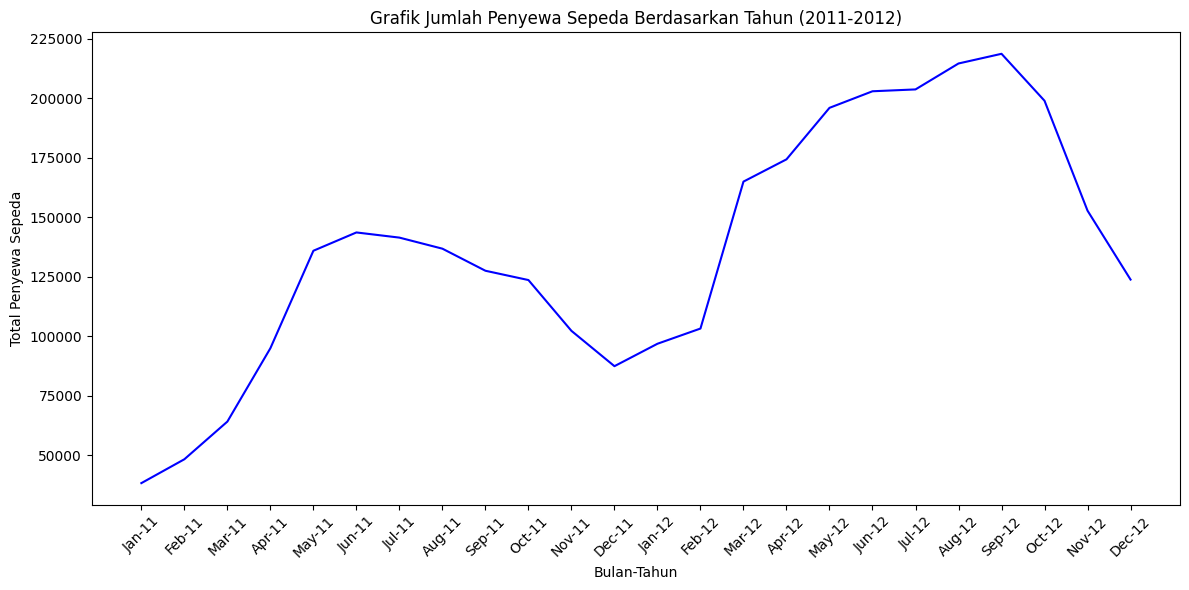

In [26]:
plt.figure(figsize=(12, 6))

sns.lineplot(x="yearmonth", y="cnt", data=year_users_df, color='blue')

plt.xlabel("Bulan-Tahun")
plt.ylabel("Total Penyewa Sepeda")
plt.title("Grafik Jumlah Penyewa Sepeda Berdasarkan Tahun (2011-2012)")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Berdasarkan grafik diatas dapat disimpulkan bahwa pada **awal setiap tahun** jumlah penyewaan sepeda **masih rendah**, kemudian terjadi **peningkatan** pada **pertengahan tahun** dan **menurun pada akhir tahun**. Jumlah penyewa sepeda pada tahun **2012** lebih tinggi daripada tahun **2011**.

### Pertanyaan 2: Pada hari apa dalam seminggu jumlah penyewa sepeda paling banyak?

In [27]:
weekday_df = df_day.groupby('weekday')[['registered', 'casual','cnt']].sum().reset_index()
weekday_df.head()

,weekday,registered,casual,cnt
0,Friday,409552,78238,487790
1,Monday,384719,70784,455503
2,Saturday,323955,153852,477807
3,Sunday,303506,140521,444027
4,Thursday,423935,61460,485395


In [28]:
day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_df_detail = pd.melt(weekday_df,
                                      id_vars=['weekday'],
                                      value_vars=['registered', 'casual'],
                                      var_name='status',
                                      value_name='count')

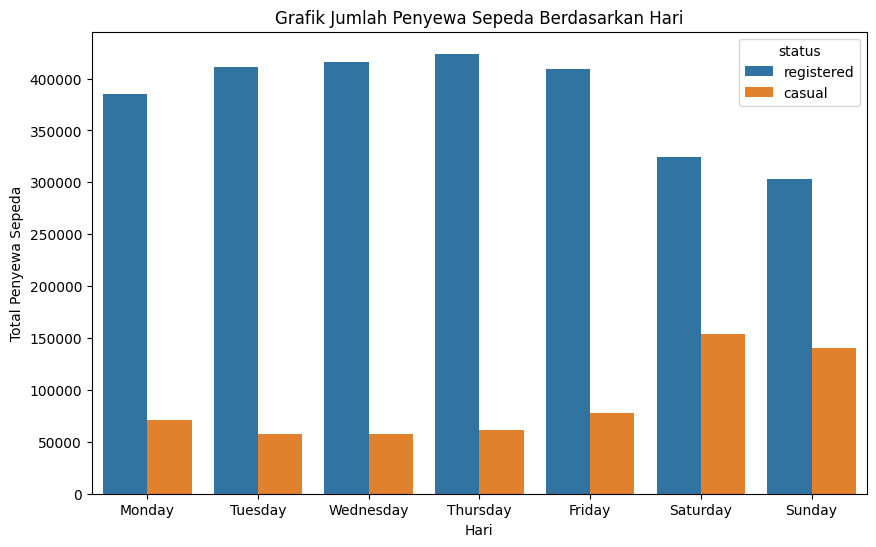

In [29]:
plt.figure(figsize=(10,6))

sns.barplot(x='weekday', y='count', data=weekday_df_detail , order=day, hue='status')

plt.xlabel("Hari")
plt.ylabel("Total Penyewa Sepeda")
plt.title("Grafik Jumlah Penyewa Sepeda Berdasarkan Hari")

plt.show()

Berdasarkan grafik diatas terlihat bahwa penyewa sepeda (registered dan casual) meningkat secara signifikan pada hari kerja tepatnya hari **jumat** dan cenderung menurun pada hari **minggu**.

### Pertanyaan 3: Pada musim apa jumlah penyewaan sepeda terbanyak?



In [30]:
season = df_day.groupby('season')[['registered', 'casual','cnt']].sum().reset_index()
season.head()

,season,registered,casual,cnt
0,Fall,835038,226091,1061129
1,Spring,410726,60622,471348
2,Summer,715067,203522,918589
3,Winter,711831,129782,841613


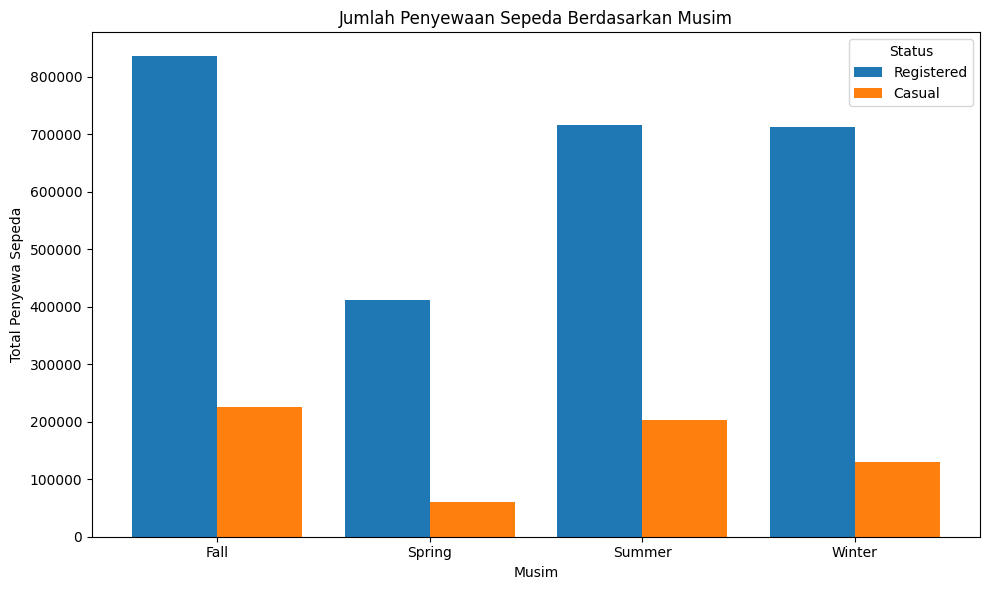

In [31]:
plt.figure(figsize=(10, 6))
x = np.arange(len(season['season']))
width = 0.4
colors = ['tab:blue', 'tab:orange']
labels = ['Registered', 'Casual']

for i, category in enumerate(['registered', 'casual']):
    plt.bar(
        x + (i - 0.5) * width,
        season[category],
        width=width,
        label=labels[i],
        color=colors[i]
    )

plt.xlabel("Musim")
plt.ylabel("Total Penyewa Sepeda")
plt.title("Jumlah Penyewaan Sepeda Berdasarkan Musim")
plt.xticks(x, season['season'])
plt.legend(title="Status")

plt.tight_layout()
plt.show()

Berdasarkan gambar diatas dapat disimpulkan bahwa penyewa sepeda baik registered maupun casual cenderung meningkat ketika **musim gugur (fall)**, dan cenderung menurun pada **musim semi (spring)**.

### Pertanyaan 4: Berapa perbandingan jumlah penyewa sepeda registered dan casual?

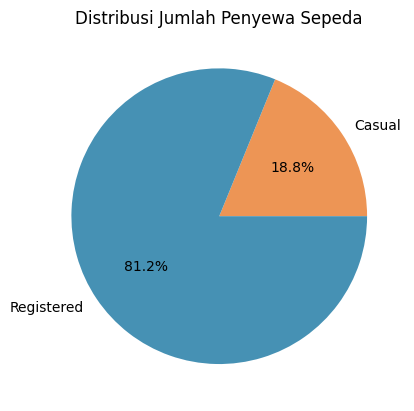

In [32]:
casual = sum(df_day['casual'])
registered = sum(df_day['registered'])

data = [casual, registered]
labels = ['Casual', 'Registered']

plt.pie(data, labels=labels, autopct='%1.1f%%', colors=["#ed9555", "#4691b4"])

plt.title("Distribusi Jumlah Penyewa Sepeda")
plt.show()

Berdasarkan Gambar diatas dapat disimpulkan bahwa sebagian besar penyewa sepeda adalah yang **sudah terdaftar (registered)** sebesar 81,2% daripada pengguna biasa yang **belum terdaftar (casual)** sebesar 18,8%.

# Conclusion


1. Pertanyaan 1 : Bagaimana performa jumlah penyewaan sepeda beberapa tahun terakhir?
   *  Pada **awal setiap tahun** jumlah penyewaan sepeda **masih rendah**, kemudian terjadi **peningkatan** pada **pertengahan tahun** dan **menurun** pada **akhir tahun**
   *  Jumlah penyewa sepeda pada tahun **2012** lebih tinggi daripada tahun **2011** hal ini mungkin terjadi karena pada awal tahun 2011 peminat sepeda masih sedikit kemudian seiring berjalannya waktu peminat sepeda semakin meningkat.
2. Pertanyaan 2 : Pada hari apa dalam seminggu jumlah penyewa sepeda paling banyak?
   *   Penyewa sepeda terbanyak terdapat pada hari kerja tepatnya hari jumat, dalam rentang hari kerja senin-jumat penyewa sepeda meningkat signifikan dan puncaknya terletak pada hari jumat.
   *   Penyewa sepeda cenderung menurun pada hari minggu.

3. Pertanyaan 3 : Pada musim apa jumlah penyewaan sepeda terbanyak?
   *   Penyewa sepeda mengalami peningkatan pada musim gugur (fall), dan mengalami penurunan pada musin semi (spring).
   *   Dapat analisis bahwa kemungkinan pada musim gugur penduduk akan lebih banyak melakukan kegiatan diluar rumah menggunakan sepeda sedangkan pada musim semi penduduk lebih memilih berada dalam rumah atau memilih menggunakan mobil daripada sepeda.
   * Perusahaan bisa menyediakan stok sepeda lebih banyak terutama pada musim gugur agar jumlah penyewa sepeda bisa meningkat.

4. Pertanyaan 4 : Berapa perbandingan jumlah penyewa sepeda yang berstatus registered dan casual?
   *   Jumlah penyewa sepeda dengan status registered lebih banyak daripada yang berstatus casual dengan rincian registered 81,2% dan casual 18,8%, kemungkinan pengguna lebih memilih untuk menjadi member yang sudah terdaftar (registered) daripada belum terdaftar (casual).
   *   Perusahaan bisa memberikan benefit lebih kepada pelanggan yang berstatus registered, agar nantinya jumlah pelanggan yang berstatus registered meningkat dan akan menambah keuntungan perusahaan.











## Analisis Lanjutan (Opsional)

Analisis Clustering terhadap frekuensi penyewa sepeda per-hari

In [33]:
# Batasan untuk rendah (0 - < 1000), sedang (antara 1000-5000), dan tinggi (> 5000)
bins = [0, 1000, 5000, float('inf')]
labels = ['Rendah', 'Sedang', 'Tinggi']

In [34]:
df_day['kategori'] = pd.cut(df_day['cnt'], bins=bins, labels=labels, right=False)

In [35]:
jumlah_per_kategori = df_day['kategori'].value_counts().reset_index()
jumlah_per_kategori.columns = ['kategori', 'jumlah']

print(jumlah_per_kategori)

  kategori  jumlah
0   Sedang     427
1   Tinggi     286
2   Rendah      18


<ipython-input-36-8f4d14003abb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='kategori', y='jumlah', data=jumlah_per_kategori, palette='Set2')


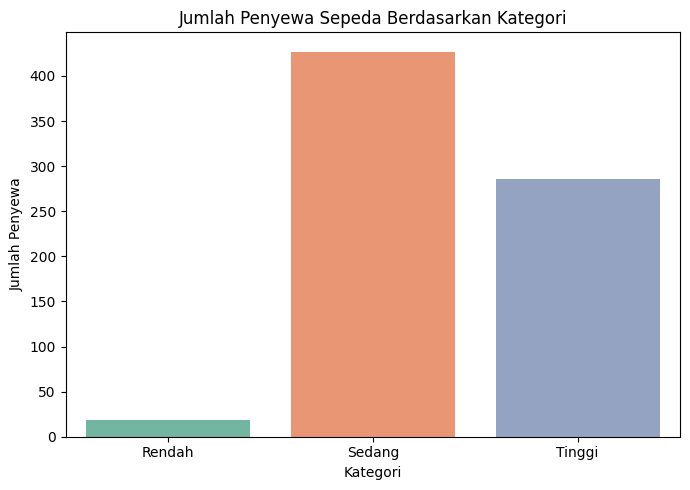

In [36]:
plt.figure(figsize=(7, 5))
sns.barplot(x='kategori', y='jumlah', data=jumlah_per_kategori, palette='Set2')

plt.xlabel("Kategori")
plt.ylabel("Jumlah Penyewa")
plt.title("Jumlah Penyewa Sepeda Berdasarkan Kategori")
plt.tight_layout()
plt.show()

- Pada kategori **rendah** terdapat 18 tupel/baris
- Pada kategori **sedang** terdapat 427 tupel/baris
- Pada kategori **tinggi** tinggi 286 tupel/baris
- Dari data tersebut dapat disimpulkan bahwa sebagian besar data memiliki jumlah penyewa sepeda dengan kategori sedang yaitu pada rentang 1000-5000 penyewa sepeda tiap harinya.